<img src="https://farm8.staticflickr.com/7916/39963452293_57af9e4023.jpg" width="386" height="500" alt="event_advertisement-1">
<a id="Welcome"><h1>Welcome</h1></a>

Detecting objects in an image is an important task for machines: 

- Self-driving cars need to detect pedestrians and traffic signs on the street; [Cool YouTube video for ADAS](https://youtu.be/jyevV_rBTt0)

- Driving assistant technologies should find the eye's gazing direction to ensure that the driver is focused on driving; [Driver Drowsiness Warning System (Ex1)](https://youtu.be/Q23K7G1gJgY), [Driver Drowsiness Warning System (Ex2)](https://www.youtube.com/embed/tL_MNBpQDMM?start=118)
- Facebook has been suggestting who and where to tag a person's name in posted images.
- Face detection for access control [Cool access control usecase](https://www.youtube.com/watch?v=K4u4Dpl6NKk)

While humans can easily detect and identify objects present in an image, 
it turns out that this had been a very difficult task for a machine until deep learning comes into the field. 

# First, look at this cool YouTube video that you are going to reproduce today.
To motivate all of you, the YouTube video below shows the performance of a state-of-art object detection deep learning model on a baby compilation video. 

### Observations

The model used here is so-called YOLO (You Only Look Once). We will get into the details of this today.

For each frame of the video, a YOLO deep learning model detects

- the location of objects, defined by the center coordinate of bounding box, and its width and height: 
$$
\begin{bmatrix}
x_{\textrm{center of bounding box}}\\
y_{\textrm{center of bounding box}}\\ 
\textrm{width}_{\textrm{bounding box}}\\ 
\textrm{height}_{\textrm{bounding box}}
\end{bmatrix}
\in R^{4}
$$

- the object's class (a person, cat etc)

In this workshop, your final goal is to learn how to use YOLO's pretrained model and reproduce this video. 
To achieve this goal, there are a lot of milestones along the way: 

- Learn how to use ipython notebook
- Learn how to import video into ipython notebook, extract frames, and edit each frame.
- Learn basic concept of the object detection. 
- Learn how to create mp4 file and git in Mac OSX. 

In [1]:
from IPython.display import IFrame
IFrame("https://www.youtube.com/embed/MASPcgZ-rCE", width=990, height=800)

### Some observations:
It is better to look in the x0.75 speed to understand what really is going on. 
#### Good: 
- "person" is detected pretty well. No matter if the person is a baby or an adult
- "dog" is also detected pretty well.

#### Bad:
- "cat" is often detect as a dog or a person
- "cat" cannot be detected at all when it stands (See the 4th baby video).

#### Interesting:
- The algorithm can recoginize cat as a cat when its face is visible.



<h1>Table of contents</h1>

<ul>
  <li><a href="#Welcome">Welcome</a></li>
  <li><a href="https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html#Setup">Setup environment*</a></li>
   <ul>
    <li> <a href="https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html#Anaconda 3.7">Install Anaconda 3.7*</a> </li>
    <li> <a href="https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html#Set up virtual environment">Set up virtual environment*</a></li>
     <li> <a href="https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html#Install python modules">Install python modules Tensorflow (v1.9.0), Keras (v2.1.2) and opencv3 (v3.4.2)*</a></li>
  </ul>
  <li><a href='https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html#Download workshop specific codes'>Download workshop specific codes*</a>  
</li>
  <li><a href="#import">Import python libraries</a></li>
  <li><a href="#Read in a video and play with it">Read in a video, extrac frames and edit them</a></li>
  <li><a href="#Object detection with YOLO">Object detection</a></li>
</ul>
** covered by the [previous blog post](https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html).


This blog post assumes that you already installed python 3.6, Tensorflow 1.9.0, Keras 2.1.2 and Opencv 3.4.2.
If you have not done so, please follow [previous blog post](https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html) to set up your virtual environment.

Then, download workshop specific codes by following instruction <a href='https://fairyonice.github.io/Step_by_Step_Data_Science_Night_Setup.html#Download workshop specific codes'>Download workshop specific codes</a>.

Open your ipython notebook in the downloaded GitHub repository.
Step_by_step_DataScience_Night_Complete.ipynb contains this script. 

Check the path of the current working directory (ipython notebook accepts Linux command!)

In [2]:
pwd

'/Users/yumikondo/Documents/project/DataScienceNight/DataScienceNightSJSU'

Here is what I see in my current working directory.

<img src="https://farm5.staticflickr.com/4893/46951885831_3d171812ea.jpg" width="800" height="99" alt="Screen Shot 2019-02-01 at 12.33.06 PM">

<a id="import"><h1>Import python libraries</h1></a>
First, we import python libraries. 
The following code should work if your virtual environment is correctly set up.

In [3]:
import os, sys
import imageio                  # computer vision library
import matplotlib.pyplot as plt # python's standard visualization library
import cv2                      # opencv, common computer vision library
import numpy as np              # python's matrix calculation library
import keras                    # high level deep learning library
import tensorflow               # low level deep learning library
print(">>My python version is {}".format(sys.version))
print(">>My opencv version is {} (opencv 3.4.2 also works)".format(cv2.__version__))
print(">>My keras version is {}".format(keras.__version__))
print(">>My tensorflow version is {}".format(tensorflow.__version__))
%matplotlib inline

/Users/yumikondo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


>>My python version is 3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
>>My opencv version is 3.2.0 (opencv 3.4.2 also works)
>>My keras version is 2.1.2
>>My tensorflow version is 1.9.0


<a id="Read in a video and play with it">
<h1> Read in a YouTube video </h1>
</a>


Now we select the video to run YOLO deep learning algorithm. 
I choose this ~3 min baby compilation. 
- [Funny Cats Protecting Babies Compilation (2017)](https://www.youtube.com/watch?v=T9fjY3SR5KE)

You can choose your own video but make sure that it is not too long. 

You can convert ~3-minute video into 360 pixel mp4 using online tool YOUTUBEMP4.
Save the downloaded video into your current working directory
- [YOUTUBEMP4](https://youtubemp4.to/) 

 

Now your folder should looks like this with an additional youtube video named "videoplayback.mp4":
<img src="https://farm5.staticflickr.com/4897/32010919177_65b159ed05.jpg" width="800" height="97" alt="Screen Shot 2019-02-01 at 12.42.27 PM">

Let's read in the videoplayback.mp4 into the ipython notebook.

In [4]:
video_name   = "videoplayback.mp4"
## instantiate the video reader object 
video_reader = cv2.VideoCapture(video_name)

Video consists of the sequence of frames (i.e., bunch of pictures). 
Running <code>video_read.read()</code>  once gives you the first frame of the video.

<code>video_read.read()</code> returns two outputs, a frame and boolean (True/False) flag: If frame is read correctly, the flag will be True. 
So you can check end of the video by checking this return value.
Let's check out the output of the <code>video_read.read()</code>



In [5]:
ret, frame = video_reader.read()
print("successfuly read? {}".format(ret))
print("frame:")
print(frame)

successfuly read? True
frame:
[[[228 113 203]
  [228 113 203]
  [228 113 203]
  ...
  [204 215  75]
  [204 215  75]
  [204 215  75]]

 [[228 113 203]
  [228 113 203]
  [228 113 203]
  ...
  [204 215  75]
  [204 215  75]
  [204 215  75]]

 [[228 113 203]
  [228 113 203]
  [228 113 203]
  ...
  [204 215  75]
  [204 215  75]
  [204 215  75]]

 ...

 [[189 145 214]
  [194 145 214]
  [202 145 213]
  ...
  [252 187 131]
  [252 187 131]
  [252 187 131]]

 [[237 139 218]
  [237 140 217]
  [239 140 215]
  ...
  [252 187 131]
  [252 187 131]
  [252 187 131]]

 [[255 137 219]
  [255 138 218]
  [253 139 216]
  ...
  [252 187 131]
  [252 187 131]
  [252 187 131]]]


- Lots of numbers between 0 - 254 show up.
- In fact, an image is read as a numpy matrix of dimention (height, width, 3).
  - 3 is the number of channels. Here, the three color channels are Blue, Green and Red.
- To see this numpy matrix object contain shape member.
 

In [6]:
frame.shape

(360, 640, 3)

- frame has 360 pixels along height and 640 pixels along width
- We can also visualize this entire image by using matplotlib function.
- <code>plt.imshow</code> assumes that the colors are ordered as Red, Green and Blue. So I need to reorder the <code>frame</code>.

**TODO**: Check how the color changes by running <code>plt.imshow</code> on <code>frame</code>.

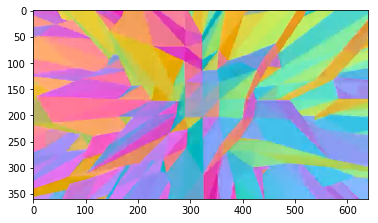

In [7]:
#plt.imshow(frame);plt.show()
#reorder the frame so that the 3 channels are orderd as R, G and then B.
frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frameRGB)
plt.show()

So we successfuly readin the first frame of our baby compilation video. 
How can we get the remaining video? We can simply run <code>video_reader.read()</code> again and that will give you the next frame. But how frequency the frames are recorded in this video? To know the frames per second, you can run the following code: 

In [8]:
fps = video_reader.get(cv2.CAP_PROP_FPS)
print("{} frames per second".format(fps))

30.0 frames per second


The following code shows the first 5 second of the video.
During the 5 seconds, there are 30 x 5 = 150 frames, which is a bit too many to plot in one ipython notebook. 
So I will only plot the 1 frame per second.

**TODO**: increase <code>secToSample</code>

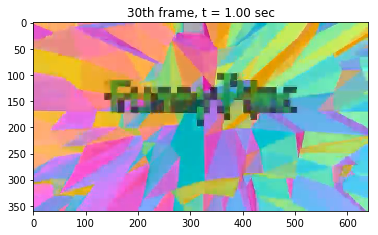

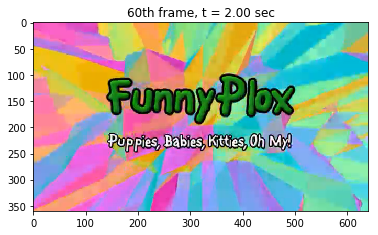

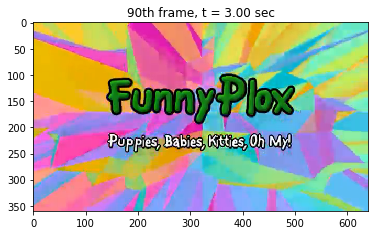

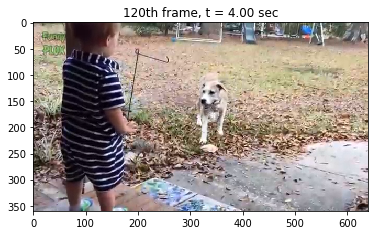

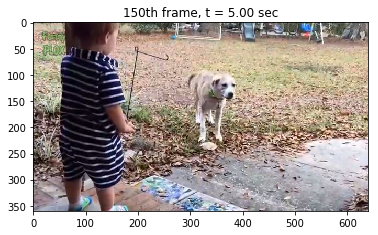

In [9]:
video_reader = cv2.VideoCapture(video_name)
secToSample = 5
count = 0 
while count < secToSample*fps:
    count += 1
    ret, frame = video_reader.read()
    if count % fps == 0:
        frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frameRGB)
        plt.title("{}th frame, t = {:3.2f} sec".format(count,count/fps))
        plt.show()

<a id="Object detection with YOLO">
# Object detection
</a>

<img src="https://farm5.staticflickr.com/4814/45943796321_d72d46d464_b.jpg" width="330">

According to the [wikipedia](https://en.wikipedia.org/wiki/Object_detection):
<blockquote>
Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.
</blockquote>
In the image above, you see a mortor cyclist and his bike. 


### The object detection tasks

- the detection of objects (where it the object? can you create a rectangle bounding box around the object?) 
  - $x_{\textrm{center of bounding box}}$: x coordinate of the center of the bounding box
  - $y_{\textrm{center of bounding box}}$: y coordinate of the center of the bounding box
  - $\textrm{width}_{\textrm{bounding box}}$:  width of the bounding box
  - $\textrm{height}_{\textrm{bounding box}}$: height of the bounding box
  
  
 
For example, the bounding boxes of person and the motorbike are defined as:

\begin{array}{rl}
\textrm{Person:}
\begin{bmatrix}
x_{\textrm{center of bounding box}}\\
y_{\textrm{center of bounding box}}\\ 
\textrm{width}_{\textrm{bounding box}}\\ 
\textrm{height}_{\textrm{bounding box}}
\end{bmatrix}
&=
\begin{bmatrix}
210\\
200\\ 
250\\ 
210
\end{bmatrix}\\
\textrm{Motorbike:}
\begin{bmatrix}
x_{\textrm{center of bounding box}}\\
y_{\textrm{center of bounding box}}\\ 
\textrm{width}_{\textrm{bounding box}}\\ 
\textrm{height}_{\textrm{bounding box}}
\end{bmatrix}
&=
\begin{bmatrix}
150\\
250\\ 
250\\ 
310
\end{bmatrix}
\end{array}

- the classification of objects (is this object a person or a cat?).
<img src="https://farm5.staticflickr.com/4863/32074103828_ec91ee420f_b.jpg" width="1024" height="478" alt="Screen Shot 2018-11-18 at 2.31.35 PM">

The object detection deep learning model needs to be trained with pre-defined class categories.

### Training deep learning model
- To create or "train" a deep learning model, you need a lot of images, and make the model learn about the patterns exisiting between the object's location and images. 
- Unfortunately, we don't have time to train a model today. So for today, we will use the model that is already pre-trained by me. 
- I trained YOLO deep learning model using PASCAL VOC2012 data, containing 17,125 frames. 
- The weights are saved as weights_yumi.h5 and readily imported with functions in backend.py. 

### Visual Object Classes Challenge 2012 (VOC2012)
The main goal of visual object classes challenge 2012 (VOC2012) is to recognize objects from a number of visual object classes in realistic scenes. 
It is a supervised learning problem in that a training set of labelled images is provided.

The twenty object classes that have been selected are:

- **Person**: person
- **Animal**: bird, cat, cow, dog, horse, sheep
- **Vehicle**: aeroplane, bicycle, boat, bus, car, motorbike, train
- **Indoor**: bottle, chair, dining table, potted plant, sofa, tv/monitor 

This means that the model cannot detect a new class object that the model has not seen previously.

The barplot below shows the number of objects found in the entire data.  
Most of objects are in the person class. 
<img src="https://farm5.staticflickr.com/4834/46888254471_178339d42d_b.jpg" width="402" alt="frame">

**Question**: Do you see why the detection performance of the person is much better than cat?

The following codes read in the pretrained weights of the deep learning model. 
I trained this object detection model in Keras framework using Pascal VOC2012. 

## Use pre-trained object detection model on the downloaded video!
Now, reading in the backend.py script that you downloaded from the Dropbox.

In [10]:
from backend import PreTrainedYOLODetector
## instantiate the object
preTrainedYOLODetector = PreTrainedYOLODetector()
print("\n\n**********************")
print("Check if the model exists as a member of the object preTrainedYOLODetector = {}".format(
    preTrainedYOLODetector.model))
## readin pretrained model using Pascal VOC2012
print("\n\nLoad pretrained weights...\n")
preTrainedYOLODetector.load("weights_yumi.h5")
print("\n\n*********************")
print("Check if the model exists as a member of the object preTrainedYOLODetector = {}".format(preTrainedYOLODetector.model))
## Let's check the model architecture 
print("\n\n*********************")
print("Keras's model summary")
preTrainedYOLODetector.model.summary()



**********************
Check if the model exists as a member of the object preTrainedYOLODetector = Undefined


Load pretrained weights...

Pretrained weights are loaded


*********************
Check if the model exists as a member of the object preTrainedYOLODetector = <keras.engine.training.Model object at 0x128e6cba8>


*********************
Keras's model summary
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 864         input_image[0][0]                
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (No

### YOLO model input encoding 

Let's look at a single frame and how it should be processed to get the object detection prediction results.
I will first select the frame at the 2 minute time point. 

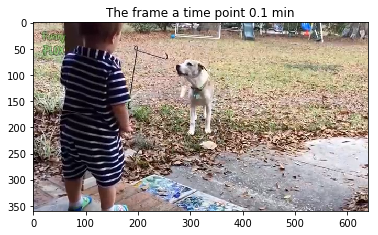

In [11]:
video_reader = cv2.VideoCapture(video_name)

# use the frame with objects 
timepoint_of_frame_in_min = 0.1
count = 0
while count < fps * 60 * timepoint_of_frame_in_min:
    count += 1
    ret, frame = video_reader.read()

frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frameRGB)
plt.title("The frame a time point {} min".format(timepoint_of_frame_in_min))
plt.show()

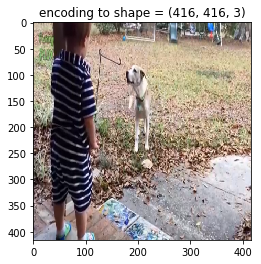

In [12]:
## encode a single frame, rescale the image to (416,416,3)
X          = preTrainedYOLODetector.imageReader.encode_core(frame)
plt.imshow(X); plt.title("encoding to shape = {}".format(X.shape)); plt.show()

In [13]:
## YOLO deep learning model prediction
y_pred     = preTrainedYOLODetector.predict(X)
# decoding YOLO output
netout_scale = preTrainedYOLODetector.outputRescaler.fit(y_pred[0])
print("shape of the prediction output = {}".format(netout_scale.shape))

shape of the prediction output = (13, 13, 4, 25)


The output of the object detection prediction is a numpy matrix of shape **(13,13,4,25)**.
To understand this output, you first need some understanding of the YOLO algorithm.

## YOLO model output decoding
Covering the details of the YOLO algorithm is outside of the scope of this workshop. I refer to my blog series [YOLO blog series to create the pretrained weights discussed in this blog](https://fairyonice.github.io/tag/object-detection-using-yolov2-on-pascal-voc2012-series.html) for interested readers. Here I will give you a brief overview to understand the output shape of <code>netout_scale</code>.

YOLO devides an image into grid cells (e.g. 13 by 13 grid cells) and assign image classification and localization algorithms in each of the grid cell.

(**13, 13**,4,25)
<img src="https://farm8.staticflickr.com/7876/46466533461_d18c10387a_b.jpg" width="512" height="488" alt="Screen Shot 2018-12-25 at 7.32.35 PM">
Which grid cell does the center of the bounding box belong?


(13, 13,**4**,25)

Conventionally, one of the biggest challenges in the object detection is to find multiple objects of various shapes within the same neighboorhood. For example, the picture above shows that a person is standing on a boat and hence the two objects are in the close vacinity.

YOLO uses an idea of "Anchor box" to wisely detect multiple objects, lying in close neighboorhood.
YOLO's Anchor box requires users to predefine two hyperparameters: 
- (1) the number of anchor boxs and 
- (2) their shapes

so that multiple objects lying in close neighboorhood can be assigned to different anchor boxes. 

The more anchor boxes, the more objects YOLO can detect in a close neighboorhood with the cost of more parameters in deep learning model. 

What about shapes? For example, you may predefine that there are four anchor boxes, and their specializations are such that:

- the 1st anchor box specializes small flat rectangle bounding box
- the 2nd anchor box specializes small tall rectangle bounding box
- the 3rd anchor box specializes large flat rectangle bounding box
- the 4th anchor box specializes large tall rectangle bounding box


(13, 13,4,**25**)

A np.array of length 25, containing prediction of the following for each grid cell and anchor: 
$$
\begin{bmatrix}
x_{\textrm{center of bounding box}}\\
y_{\textrm{center of bounding box}}\\ 
\textrm{width}_{\textrm{bounding box}}\\ 
\textrm{height}_{\textrm{bounding box}}\\ 
p_{\textrm{confidence of bounding box}}\\ 
p_{\textrm{aeroplane}}\\ 
p_{\textrm{bicycle}}\\ 
p_{\textrm{boat}}\\
p_{\textrm{bottle}}\\
p_{\textrm{bus}}\\
p_{\textrm{car}}\\
p_{\textrm{cat}}\\
p_{\textrm{chair}}\\
p_{\textrm{cow}}\\
p_{\textrm{diningtable}}\\
p_{\textrm{dog}}\\
p_{\textrm{horse}}\\
p_{\textrm{motorbike}}\\
p_{\textrm{person}}\\
p_{\textrm{pottedplant}}\\
p_{\textrm{sheep}}\\
p_{\textrm{sofa}}\\
p_{\textrm{train}}\\
p_{\textrm{tvmonitor}}
\end{bmatrix}
\in R^{25}
$$

This means that regardless of the existence of an object, this model detect that 845 ( = 13 x 13 x  5 ) bounding boxes. Of course, many of these the detected bounding box do not contain actual objects. 
<img src="https://farm8.staticflickr.com/7914/46900507192_93a08020ff.jpg" width="600"  alt="Screen Shot 2019-02-01 at 2.13.03 PM">

To filter output the detected bounding box that are likely not containing the actual object, we can use $p_{\textrm{confidence of the bounding box}}$, measuring the probability that the bounding box contains the actual object.
I will only accept the detected bounding box that has $p_{\textrm{confidence of the bounding box}} > $ <code>obj_threshold </code> 

**TODO**: Play with the <code>obj_threshold</code> values

In [14]:
obj_threshold = 0.015

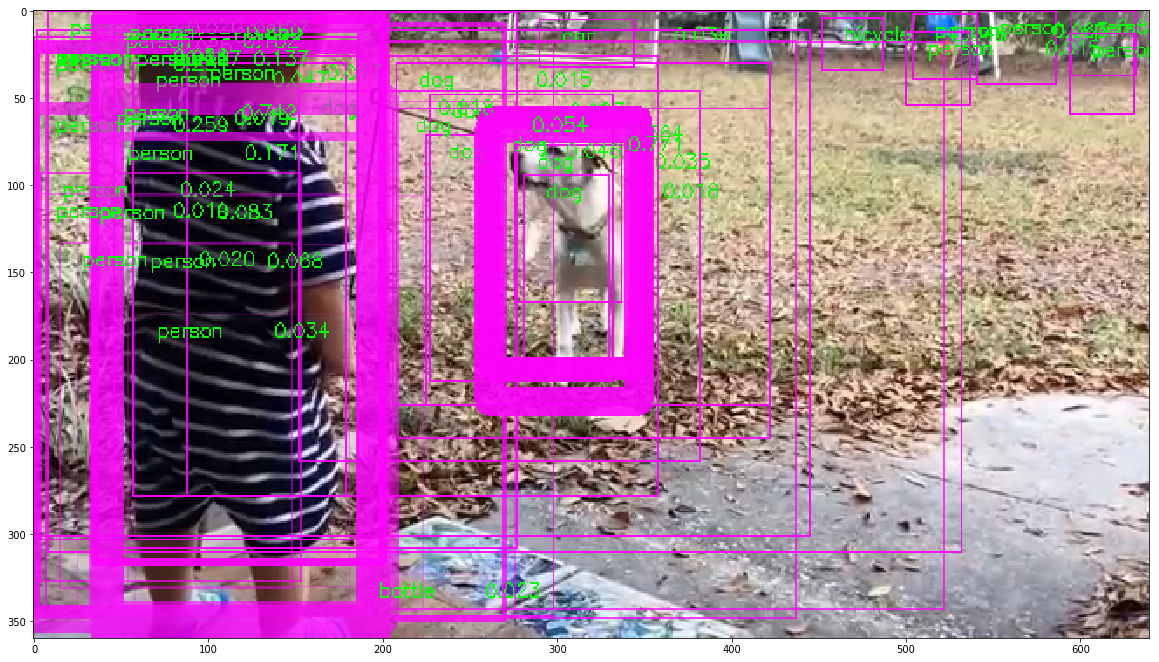

In [15]:
from backend import find_high_class_probability_bbox, nonmax_suppression, draw_boxes
boxes    = find_high_class_probability_bbox(netout_scale,obj_threshold)
frame_bbx = draw_boxes(frame,boxes, preTrainedYOLODetector.LABELS)
frameRGB  = cv2.cvtColor(frame_bbx, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20));plt.imshow(frameRGB); plt.show()

The number of bounding box gets reduced but there are still too many bounding boxes.
It seems that many bounding boxes are captuering the same object.
We only need one good bounding box per object. 



## Nonmax surpression
Nonmax surpression is a way to detect a single object only once. Andrew Ng has presented the idea of nonmax supression in his lecture very well: [C4W3L07 Nonmax Suppression](https://www.youtube.com/watch?v=VAo84c1hQX8).

The following code implement the nonmax surpression algorithm. For each object class, the algorithm picks the most promissing bounding box, and then remove (or suppress) the remaining bounding box that contain high overlap with the most promissing bounding box = (high predicted class probability). 

- To calculate the amount of overlap, intersection overunion is used:
<img src="https://farm5.staticflickr.com/4839/46007894091_39ba95c082_b.jpg" width="352" alt="Screen Shot 2018-11-22 at 7.02.28 PM">

### Nonmax surpression algorithm
- Pick the box with the largest class probability, output it as a bounded object
- Discard any remaining bounding box with IoU > <code>iou_threshold</code> with the box output in the previous step.

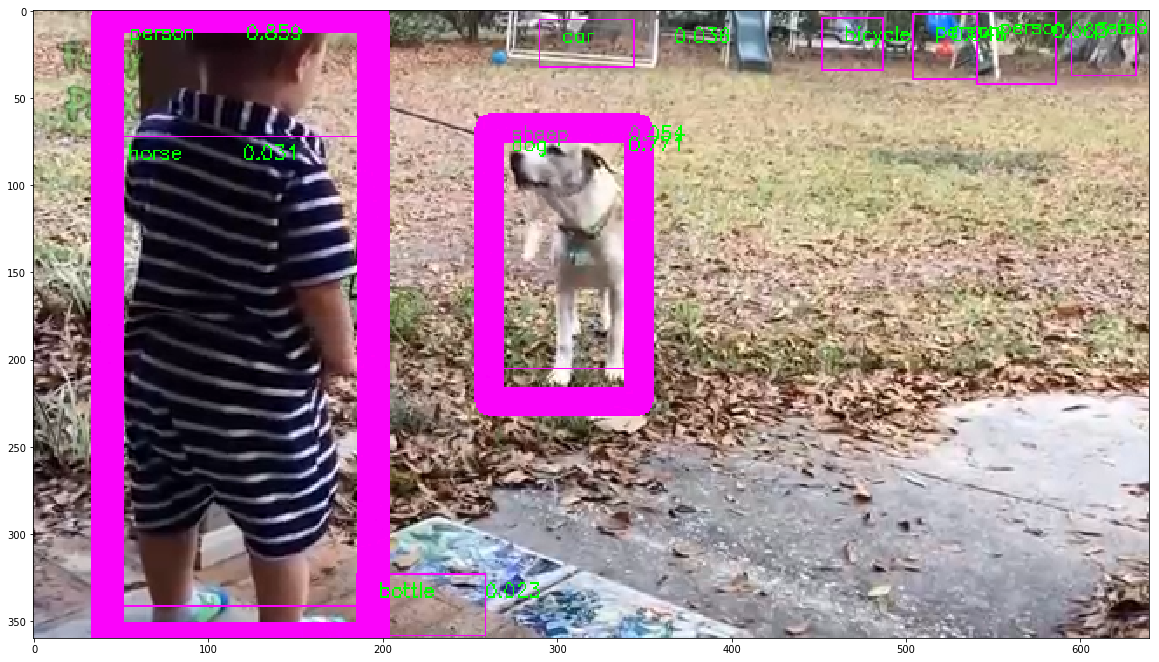

In [16]:
boxes       = find_high_class_probability_bbox(netout_scale,obj_threshold)
final_boxes = nonmax_suppression(boxes,
                                 iou_threshold = 0.1,
                                 obj_threshold = obj_threshold)
frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frameRGB = draw_boxes(frameRGB,final_boxes, preTrainedYOLODetector.LABELS)
plt.figure(figsize=(20,20)); plt.imshow(frameRGB); plt.show()

Looks much better! 

Now, create a video that combines all the prediction results.
First, create a folder that contains every frame with predicted bounding box.

In [ ]:
dir_png = "./png_folder"
try:
    os.makedirs(dir_png)
except:
    pass

### Create png files and save it in the specified folder <code>dir_png</code>

In [ ]:
from backend import find_high_class_probability_bbox, nonmax_suppression, draw_boxes
# the length of the videos where I conduct the object detection.
Nmin          = 2
max_count     = fps * 60 * Nmin * 1
# fps = 30 would take too long so I will reduce the frame rate
fps_my_video  = 15 
obj_threshold = 0.2

_slice = np.max([int(fps_my_video/fps), 1 ])

video_reader = cv2.VideoCapture(video_name)

total_frames_in_my_video = max_count/_slice
print("N png files to save: {}".format(total_frames_in_my_video))
count, my_frame_number = 0,0
while count < max_count:
    count += 1
    ret, frame = video_reader.read()
    if count % _slice == 0:
        ## encode YOLO input
        X          = preTrainedYOLODetector.imageReader.encode_core(frame)
        ## YOLO prediction
        y_pred     = preTrainedYOLODetector.predict(X)
        # decoding YOLO output
        netout_scale = preTrainedYOLODetector.outputRescaler.fit(y_pred[0])
        boxes        = find_high_class_probability_bbox(netout_scale,obj_threshold)
        if len(boxes) > 0:
            final_boxes = nonmax_suppression(boxes,
                                            iou_threshold=0.3,
                                            obj_threshold=obj_threshold)
            if len(final_boxes) > 0: 
                frameRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame    = draw_boxes(frameRGB,
                                      final_boxes,
                                      preTrainedYOLODetector.LABELS)
        else:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(20,20))
        plt.subplots_adjust(hspace=0.02,wspace=0.01, left=0,right=1,bottom=0, top=1) 
        plt.imshow(frame)
        plt.savefig(dir_png + "/fig_{:04.0f}.png".format(count),bbox_inches='tight',pad_inches=0)
        plt.close()


N png files to save: 3600.0


In [ ]:
_slice

### Use ffmpeg to convert pngs to the mp4 video
If you do not have ffmpeg, follow this tutorial to install it [ffmpeg installation](https://www.youtube.com/watch?v=8nbuqYw2OCw).

Following the [suggestion in stackoverflow](https://superuser.com/questions/820134/why-cant-quicktime-play-a-movie-file-encoded-by-ffmpeg)
From the terminal run:
    
    
    

      
       ffmpeg -pattern_type glob -i "fig_*.png" -vcodec libx264 -s 640x480 -pix_fmt yuv420p movie.mp4   

### Convert pngs to gif
If you cannot run ffmpeg, we can still create .gif

In [ ]:
def create_gif(gifname,dir_image,duration=1):
    filenames = np.sort(os.listdir(dir_image))
    filenames = [ fnm for fnm in filenames if ".png" in fnm]

    with imageio.get_writer(dir_image + '/' + gifname + '.gif', 
                            mode='I',duration=duration) as writer:
        for filename in filenames:
            image = imageio.imread(os.path.join(dir_image, filename))
            writer.append_data(image)
            
gifname = "gif_yolo_output"
create_gif(gifname,dir_png,duration=1)

That is all for this workshop.
Congratulations for coming this far! 
